# **2022년 빅데이터 동아리 특강 - 오리엔테이션 (2022년 7월 25일)**

대학원 기술경영학과 (Management of Technology) - 송지훈 교수

🧑👩 학생 여러분, 빅데이터 동아리에 오신걸 환영합니다 !\
짧은 시간이지만, 여러분들이 다양한 특강을 기반으로 **스스로 학습** 및 **경진대회**에 **참가** 할 수 있는 **역량**을 갖출 수 있도록 지원하는게 주 목적 입니다.

**나중을 위한 팁**\
✅ You can only learn data science by doing data science. (실제로 코드를 구현해 봐야 합니다 ~) \
✅ Practice, practice, practice. (연습하고 또 연습하세요, 짧은 강의시간에 모든 세세한 내용을 전부 다룰수 없습니다 + 끊임없는 연습만이 완벽함을 만듭니다. )\
✅ Free resources everywhere. (인터넷상에는 무료로 데이터 분석 또는 프로그래밍 관련 공부를 할 수 있는 많은 자료들이 존재 합니다. 적극적으로 찾아서 이용하세요.)

# 참조 웹사이트 (https://www.kaggle.com/datasets/agileteam/bigdatacertificationkr)

## **문제6**

(1) 주어진 데이터셋(big_practice1.csv)에서 이상치를 찾아라(소수점 나이)
- 주어진 데이터에서 이상치(소수점 나이)를 찾고 올림, 내림, 버림(절사)했을때 3가지 모두 이상치 'age' 평균을 구한 다음 모두 더하여 출력하시오

* import numpy as np
* 올림: np.ceil()
* 내림: np.floor()
* 버림: np.trunc() 

영어로 truncate의 의미: (아래나 위를 잘라서) 길이를 줄이다[짧게 하다]

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/gnu-mot/student_club/main/big_practice1.csv')

In [3]:
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [4]:
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [5]:
x = 27.0
np.floor(x)

27.0

In [6]:
y = 27.8
np.floor(y)

27.0

In [7]:
# 소수점 나이를 찾기 (나이가 소수점이면 이상치로 판단)
df_new = df[(df['age']-np.floor(df['age']))!= 0]
df_new

,id,age,city,f1,f2,f3,f4,f5
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
21,id22,-6.3,부산,72.0,1,NaN,ENFP,52.667078
28,id29,-13.5,부산,47.0,2,NaN,ENTP,67.886373
46,id47,34.6,대구,75.0,1,NaN,ESTJ,90.496999
64,id65,26.5,경기,NaN,0,NaN,ISFP,91.297791
84,id85,83.6,경기,55.0,0,NaN,INFJ,80.138280
92,id93,21.8,경기,57.0,0,NaN,ISFP,73.586397


In [9]:
# 올림, 내림, 버림(절사)했을때 3가지 모두 이상치 'age' 평균을 구한다
# 올림
m_ceil = np.ceil(df_new['age']).mean()
# 내림
m_floor = np.floor(df_new['age']).mean()
# 버림
m_trunc = np.trunc(df_new['age']).mean()
# 평균을 모두 더해준다
print(m_ceil + m_floor + m_trunc)

69.5


## **문제7**

(1) 결측치 처리
- 주어진 데이터에서 결측치가 80%이상 되는 컬럼은(변수는) 삭제하고, 80% 미만인 결측치가 있는 컬럼은 'city'별 중앙값으로 값을 대체하고 'f1'컬럼의 평균값을 출력하세요!

In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/gnu-mot/student_club/main/big_practice1.csv')

In [34]:
df.shape

(100, 8)

In [35]:
df.isnull().sum() # 비율 값이 아님 (절대값)

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [36]:
# 비율로 확인 필요
missing_check = df.isnull().sum() / len(df)
missing_check.sort_values(ascending=False, inplace=True)
missing_check

f3      0.95
f1      0.31
id      0.00
age     0.00
city    0.00
f2      0.00
f4      0.00
f5      0.00
dtype: float64

In [37]:
# f3 컬럼 삭제
print("삭제 전:", df.shape)
df_drop = df.drop(['f3'], axis=1)
print("삭제 후:", df_drop.shape)

삭제 전: (100, 8)
삭제 후: (100, 7)


In [38]:
df_drop.head()

,id,age,city,f1,f2,f4,f5
0,id01,2.0,서울,NaN,0,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,INFP,52.667078
4,id05,24.0,서울,85.0,2,ISFJ,29.269869


In [39]:
type(missing_check)

pandas.core.series.Series

In [40]:
# Series를 DataFrame으로 전환
missing = pd.DataFrame(missing_check, columns=['percentage']).reset_index()
missing

,index,percentage
0,f3,0.95
1,f1,0.31
2,id,0.00
3,age,0.00
4,city,0.00
5,f2,0.00
6,f4,0.00
7,f5,0.00


In [41]:
#  80% 미만인 결측치가 있는 컬럼은 f1
df_drop['city'].unique()

array(['서울', '부산', '대구', '경기'], dtype=object)

In [42]:
# 도시별 중앙값 계산
seoul = df_drop[df_drop['city']=='서울']['f1'].median()
gyeongi = df_drop[df_drop['city']=='경기']['f1'].median()
busan = df_drop[df_drop['city']=='부산']['f1'].median()
daegu = df_drop[df_drop['city']=='대구']['f1'].median()

In [46]:
print(seoul,gyeongi, busan, daegu)

68.0 58.0 62.0 75.0


In [47]:
# 더 손쉽게 해결하는 방법
df_drop.groupby("city")['f1'].median()

city
경기    58.0
대구    75.0
부산    62.0
서울    68.0
Name: f1, dtype: float64

In [48]:
df_drop

,id,age,city,f1,f2,f4,f5
0,id01,2.0,서울,NaN,0,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,INFP,52.667078
4,id05,24.0,서울,85.0,2,ISFJ,29.269869
...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,INFP,67.886373
97,id98,39.0,경기,58.0,2,INFP,98.429899
98,id99,1.0,경기,47.0,0,ESFJ,97.381034


In [49]:
# f1결측치 city별 중앙값으로 대체
# fillna()
# map()의 역할을 스스로 찾아 보세요
df_drop['f1'] = df_drop['f1'].fillna(df_drop['city'].map({'서울':seoul,'경기':gyeongi,'부산':busan,'대구':daegu}))

In [50]:
df_drop.isnull().sum()

id      0
age     0
city    0
f1      0
f2      0
f4      0
f5      0
dtype: int64

In [52]:
# 구하고자 하는 최종 값
print(df_drop['f1'].mean())

65.52


## **문제8**

(1) 왜도와 첨도 구하기
주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오
데이터셋 : House Prices - Advanced Regression Technique (https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/gnu-mot/student_club/main/price_advanced.csv')

In [54]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [56]:
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

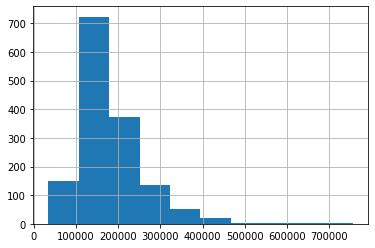

In [57]:
df['SalePrice'].hist()

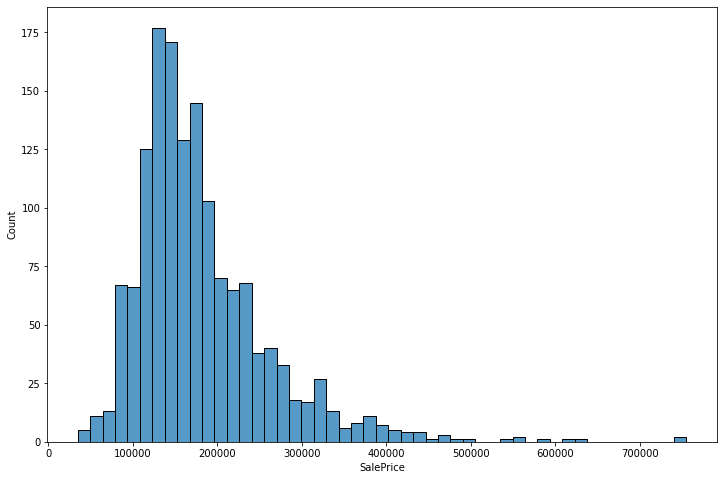

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize = (12,8))
ax = sns.histplot(df['SalePrice'])

In [60]:
# 'SalePrice'컬럼의 왜도와 첨도계산
s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurt()
print("왜도:" ,s1)
print("첨도:" ,k1)

왜도: 1.8828757597682129
첨도: 6.536281860064529


In [63]:
# 'SalePrice'컬럼 로그변환
df['SalePrice'] = np.log1p(df['SalePrice'])

In [62]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice2
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699,2.656595
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016,2.646814
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171,2.661460
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405,2.628242
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220,2.669255


In [64]:
# 'SalePrice'컬럼의 왜도와 첨도계산
s2 = df['SalePrice'].skew()
k2 = df['SalePrice'].kurt()
print("왜도:" ,s2)
print("첨도:" ,k2)

왜도: -0.009228740596903805
첨도: 0.8870294355416966


In [65]:
print(round(s1+s2+k1+k2,2))

9.3


## **문제9**

(1) 조건에 맞는 데이터 표준편차 구하기
* 주어진 데이터 중 basic1.csv에서 'f4'컬럼 값이 'ENFJ'와 'INFP'인 'f1'의 표준편차 차이를 절대값으로 구하시오

In [68]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/gnu-mot/student_club/main/big_practice1.csv')

In [72]:
collection = df[(df['f4'] == 'ENFJ') | (df['f4'] == 'INFP') ]
collection

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
32,id33,47.0,부산,94.0,0,NaN,ENFJ,17.252986
33,id34,65.0,부산,NaN,1,NaN,INFP,48.431184
40,id41,81.0,대구,55.0,0,NaN,ENFJ,37.113739
44,id45,97.0,대구,88.0,0,NaN,ENFJ,13.049921
53,id54,53.0,대구,NaN,1,NaN,ENFJ,69.730313
76,id77,77.0,경기,31.0,0,NaN,INFP,98.429899
91,id92,97.0,경기,78.0,1,NaN,INFP,97.381034


In [74]:
enfj = df[(df['f4'] == 'ENFJ')]['f1'].std()
infp = df[(df['f4'] == 'INFP')]['f1'].std()

In [75]:
print(enfj, infp)

17.727097901235837 23.586719427112648


In [76]:
# 두 표준편차 차이 절대값 출력
print(np.abs(enfj - infp))

5.859621525876811


## **문제10**

(1) 결측치 제거 및 그룹 합계에서 조건에 맞는 값 찾아 출력
* 주어진 데이터에서 'f1'컬럼 결측 데이터를 제거하고, 'city'와 'f2'을 기준으로 묶어 합계를 구하고, 'city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오

In [77]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/gnu-mot/student_club/main/big_practice1.csv')

In [78]:
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [79]:
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [80]:
# f1컬럼 결측치 제거
# ~ (물결모양)은 부정의 표시
df_removed = df[~df['f1'].isnull()]
df_removed

,id,age,city,f1,f2,f3,f4,f5
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
5,id06,22.0,서울,57.0,0,vip,INTP,20.129444
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
...,...,...,...,...,...,...,...,...
94,id95,77.0,경기,43.0,1,NaN,INTJ,91.297791
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [82]:
# 다른 방법
df_another = df.dropna(axis=0,subset=['f1'])
df_another

,id,age,city,f1,f2,f3,f4,f5
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
5,id06,22.0,서울,57.0,0,vip,INTP,20.129444
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
...,...,...,...,...,...,...,...,...
94,id95,77.0,경기,43.0,1,NaN,INTJ,91.297791
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [84]:
# 그룹 합계 계산
result = df_removed.groupby(['city','f2']).sum()
result

age     f1          f5
city f2                          
경기   0   720.4  833.0  943.944823
     1   696.0  670.0  657.241212
     2   239.0  311.0  362.300060
대구   0   387.0  527.0  183.199568
     1   217.6  235.0  241.333824
     2   140.0  211.0   79.667919
부산   0   331.0  389.0  284.371097
     1   188.7  315.0  299.270973
     2   -13.5   47.0   67.886373
서울   0   145.0  278.0  218.528577
     1   315.3  534.0  438.485010
     2    68.3  207.0  126.661135

In [85]:
result.shape

(12, 3)

In [86]:
result.iloc[0]

age    720.400000
f1     833.000000
f5     943.944823
Name: (경기, 0), dtype: float64

In [87]:
# 조건에 맞는 값 출력
# city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오
print(result.iloc[0]['f1'])

833.0


In [88]:
result2 = result.reset_index()
result2

,city,f2,age,f1,f5
0,경기,0,720.4,833.0,943.944823
1,경기,1,696.0,670.0,657.241212
2,경기,2,239.0,311.0,362.300060
3,대구,0,387.0,527.0,183.199568
4,대구,1,217.6,235.0,241.333824
5,대구,2,140.0,211.0,79.667919
6,부산,0,331.0,389.0,284.371097
7,부산,1,188.7,315.0,299.270973
8,부산,2,-13.5,47.0,67.886373
9,서울,0,145.0,278.0,218.528577


In [94]:
result2[(result2['city'] =='경기') & (result2['f2'] == 0)]

,city,f2,age,f1,f5
0,경기,0,720.4,833.0,943.944823


In [95]:
result2[(result2['city'] =='경기') & (result2['f2'] == 0)]['f1']

0    833.0
Name: f1, dtype: float64